# Comparaison des différentes méthodes

## Récupération des données et calcul des trajectoires

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils as ut

sigma = np.load("data/cov_matrix_sigma.npy")
CI = pd.read_csv("data/CarbonIntensity.csv")
CI0 = CI["CARBON_EMISSIONS_SCOPE_12_FY23"].values.reshape(-1, 1)
Green = CI["CT_TOTAL_MAX_REV"].values.reshape(-1, 1)
bench = (CI["Weight"].values / CI["Weight"].sum()).reshape(-1, 1)

### Optimisations

In [3]:
t0, t = 2023, 2024
times = np.arange(t0, t + 1)
# PAB label: Rm=0.5 dr=0.07
R_ = ut.decarbonization_pathway(t0, times, 0.5, 0.07)
print(R_.shape)
# Greenness evolution
g = 1
# CM* = 7%
CMstar = np.zeros(1)
CMstar[0]=-0.07

(2,)


In [4]:
# Carbon emissions only
x_list_CE, te_CE, CI = ut.solve_optim(R_, CI, CI0, bench, sigma, constraints_green = False, name = "CE")

#Carbon emissions and greenness
x_list_green, te_green, CI = ut.solve_optim(R_, CI, CI0, bench, sigma, Green, CMstar, g, constraints_green=True,name = "G")

# lambda = 2e-8
l = 2e-8
x_list_l, te_l, CI = ut.solve_optim_lambda(R_,CI,CI0, bench, sigma, Green, CMstar, g,l)

23


c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warn

24


c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:176: UserWarning: Warning : G was reshaped as its shape was not of form (_,_)
  warnings.warn("Warning : G was reshaped as its shape was not of form (_,_)")
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warn

23


c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")


24


c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:137: UserWarning: Warning : The p matrix in the QP problem was set to 0 as it was either empty or None -- Continuing optimization !
  warnings.warn(
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : b was reshaped as its shape was not of form (n,)")
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:202: UserWarning: Warning : h was reshaped as its shape was not of form (n,)
  warnings.warn("Warning : h was reshaped as its shape was not of form (n,)")
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\PortfolioToolboxQP\PortfolioToolboxQP\Qp_Solver.py:189: UserWarning: Warning : b was reshaped as its shape was not of form (n,)
  warnin

## Comparaison

### Tracking error

In [5]:
te_CE.shape

(2, 1)

In [6]:
te_green.shape

(2, 1)

In [7]:
te_l.shape

(2, 1)

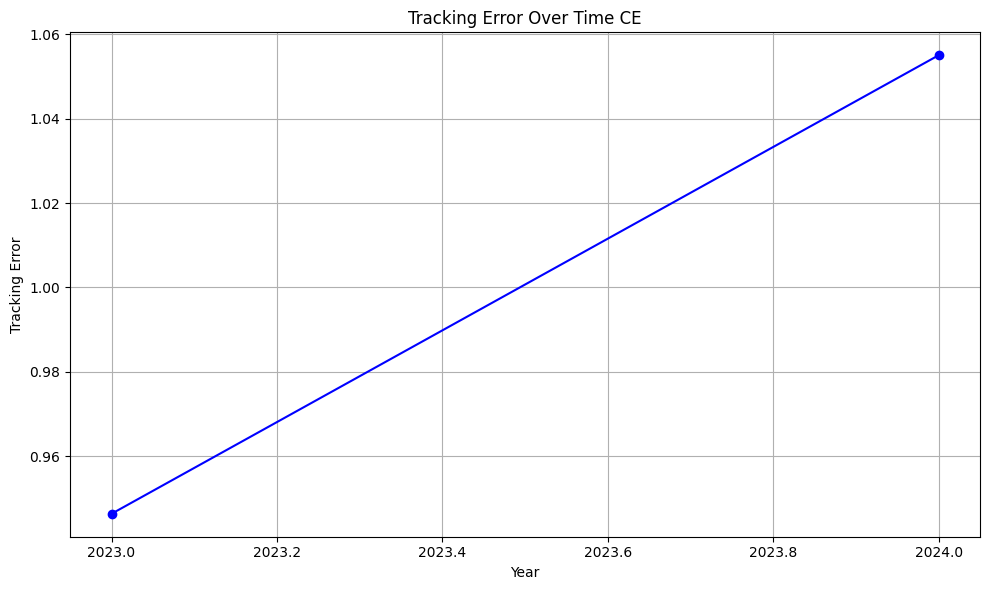

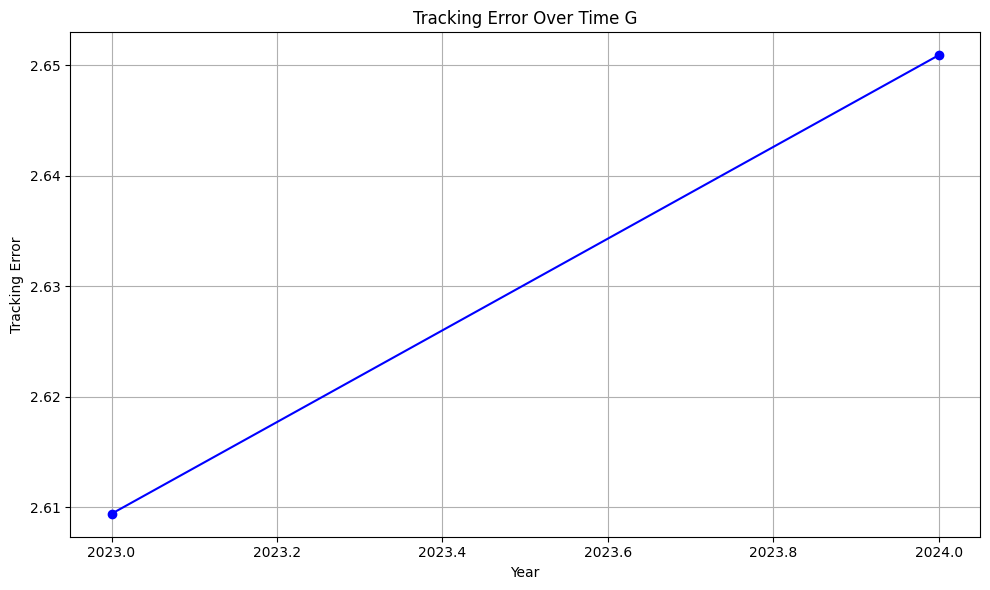

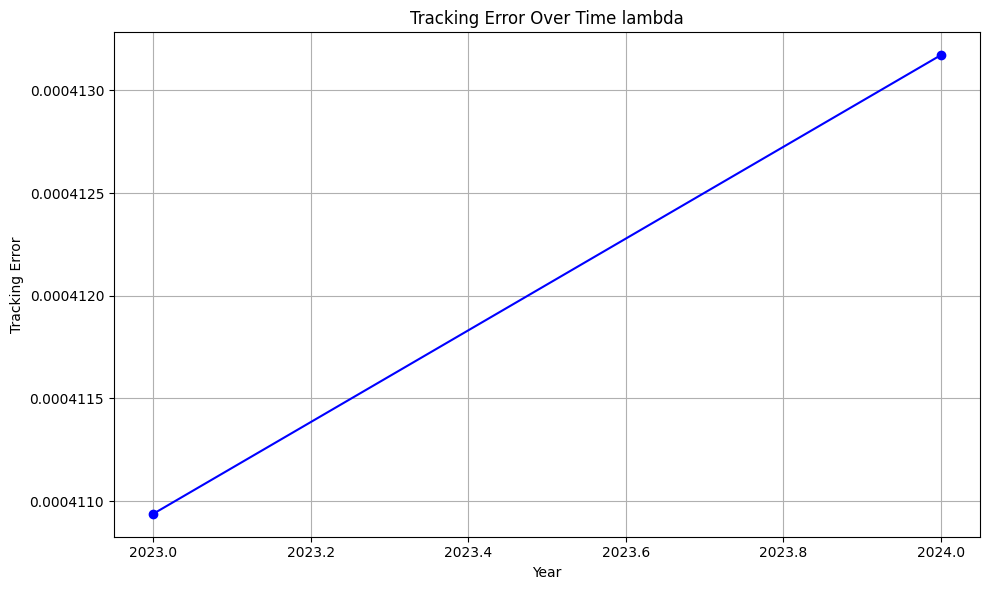

In [ ]:
ut.te_over_time(np.sqrt(te_CE) * 1e4, times, " CE")
ut.te_over_time(np.sqrt(te_green) * 1e4, times, " G")
ut.te_over_time(np.sqrt(te_l),times, " lambda")

### Greenness

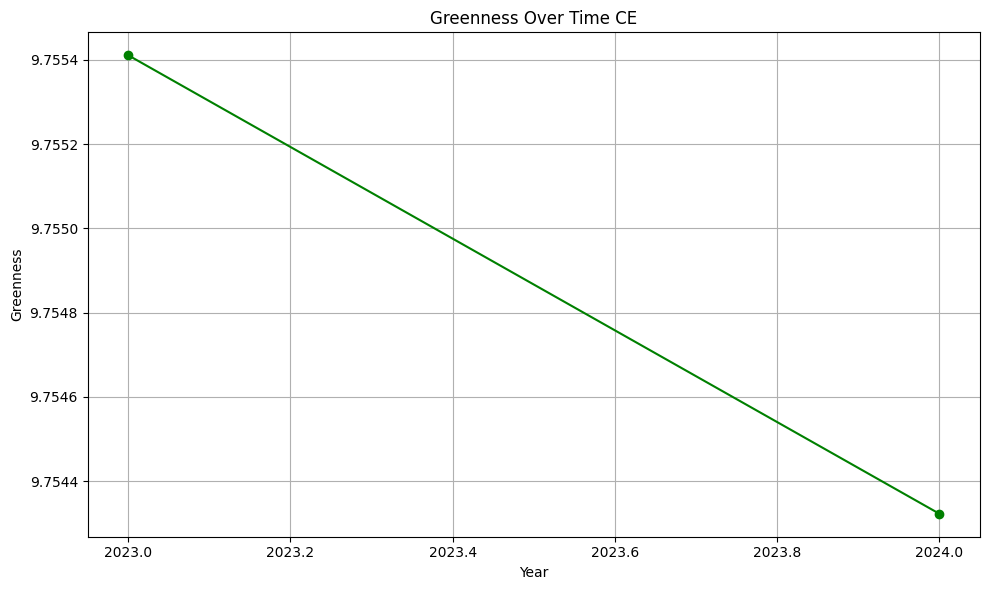

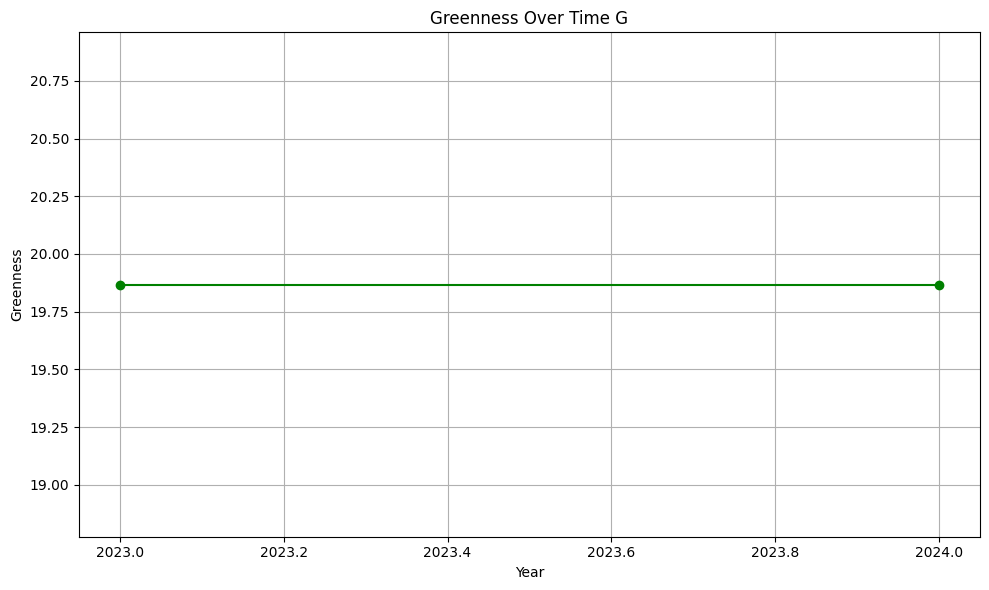

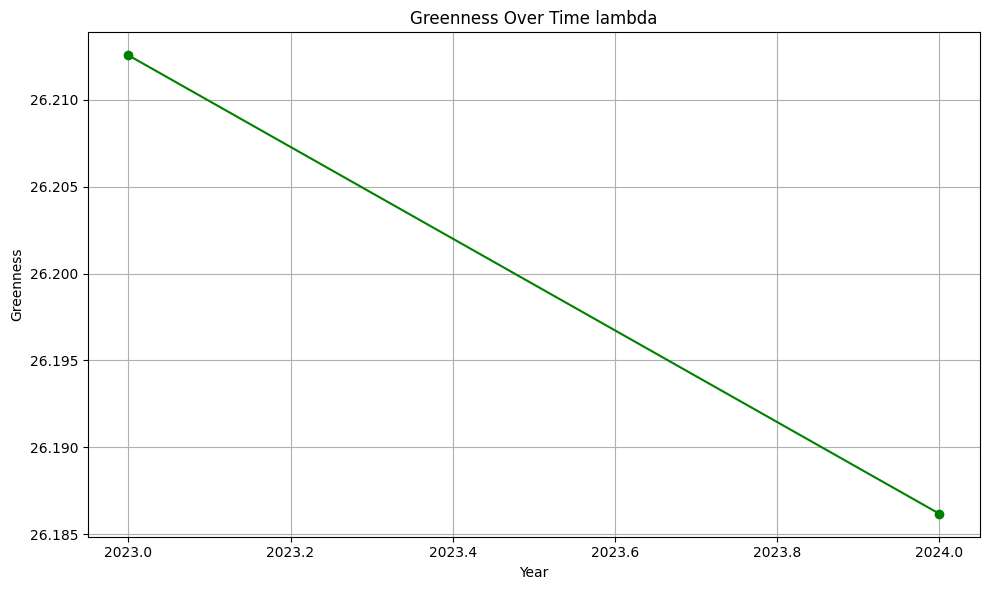

In [9]:
ut.greenness(Green,CI,times,"Weights_CE_FY"," CE")
ut.greenness(Green,CI,times,"Weights_G_FY"," G")
ut.greenness(Green,CI,times,"Weight_G_lambda_"+str(l)+"_FY"," lambda")

### Sector evolution

In [10]:
ut.hist_per_sector(CI,'Weights_CE_FY', "CE")
ut.hist_per_sector(CI,"Weights_G_FY", "G")
ut.hist_per_sector(CI,"Weight_G_lambda_"+str(l)+"_FY", "lambda")

KeyError: "Columns not found: 'Weights_CE_FY50'"

### Evolution of non zero weights

c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\utils.py:195: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CI[f"zero_{23 + i}"] = CI[col] > 0.00001  # Ajuster l'index des années (par exemple, FY23 = 2023)
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\utils.py:195: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CI[f"zero_{23 + i}"] = CI[col] > 0.00001  # Ajuster l'index des années (par exemple, FY23 = 2023)
c:\Users\vahye\Desktop\ENSAE\projet_finance\net-zero-portfolio\utils.py:195: PerformanceWarn

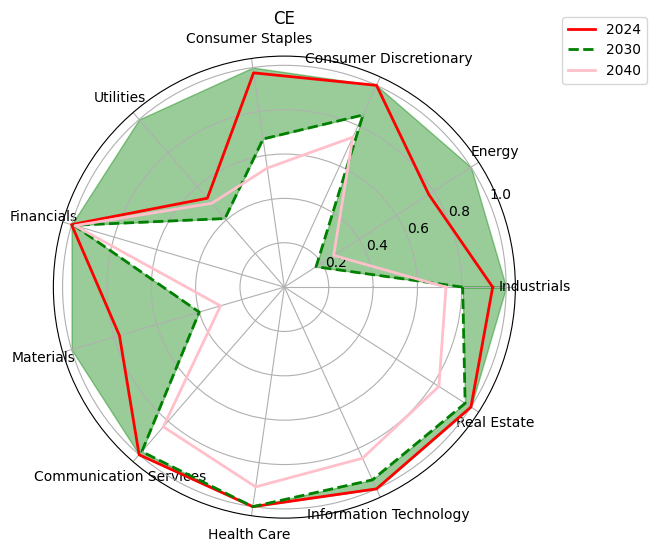

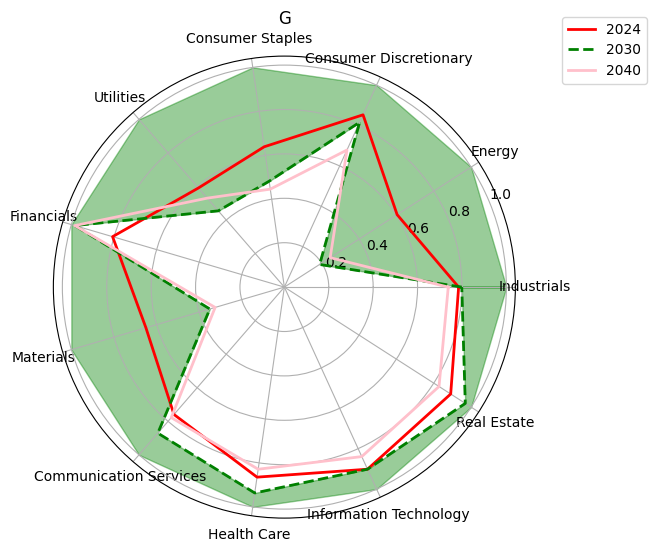

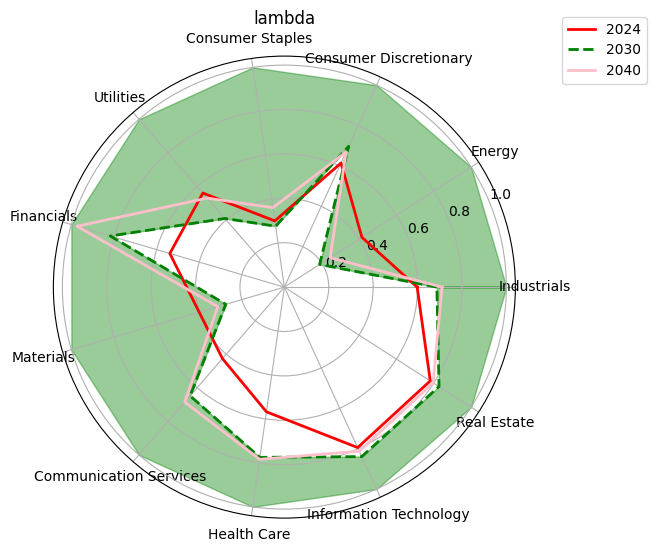

In [ ]:
ut.spider_graph(CI,'Weights_CE_FY', "CE")
ut.spider_graph(CI,"Weights_G_FY", "G")
ut.spider_graph(CI,"Weight_G_lambda_"+str(l)+"_FY", "lambda")